In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
import os

# Optionally force tensorflow on CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import os
import tensorflow as tf
import keras
import numpy as np

from rule4ml.parsers.data_parser import (
    read_from_json,
    get_global_data,
    get_sequential_data,
    to_dataframe,
)

from rule4ml.parsers.data_parser import (
    default_board_map,
    default_strategy_map,
    default_layer_type_map,
)

base_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
json_data = read_from_json(
    os.path.join(base_path, "datasets", "benchmark_vsynth_data.json"),
)

meta_data, global_inputs, targets = get_global_data(json_data)
sequential_inputs = get_sequential_data(json_data)

# Ordinal encoding of categorical inputs
global_categorical_maps = {
    "strategy": default_strategy_map,
    "board": default_board_map,
}
sequential_categorical_maps = {
    "layer_type": default_layer_type_map,
}

test_df = to_dataframe(
    meta_data=meta_data,
    global_inputs=global_inputs,
    sequential_inputs=sequential_inputs,
    global_categorical_maps=global_categorical_maps,
    sequential_categorical_maps=sequential_categorical_maps,
    targets=targets,
)

seed_num = 1337
np.random.seed(seed_num)
keras.utils.set_random_seed(seed_num)
tf.config.experimental.enable_op_determinism()

feature_labels = [
    "strategy",
    "board",
    # "precision",
    # "model_total_bits",
    # "model_integer_bits",
    # "model_fractional_bits",
    "reuse_mean",
    "weight_total_bits",
    # "weight_integer_bits",
    # "weight_fractional_bits",
    # "dense_count",
    # "batchnormalization_count",
    # "add_count",
    # "concatenate_count",
    # "dropout_count",
    # "relu_count",
    # "sigmoid_count",
    # "tanh_count",
    # "softmax_count",
    # "dense_parameters_mean",
    # "dense_inputs_mean",
    # "dense_outputs_mean",
    # "dense_reuse_mean",
    "dense_inputs_mean",
    # "dense_inputs_min",
    # "dense_inputs_min_idx",
    # "dense_inputs_max",
    # "dense_inputs_max_idx",
    "dense_outputs_mean",
    # "dense_outputs_min",
    # "dense_outputs_min_idx",
    # "dense_outputs_max",
    # "dense_outputs_max_idx",
    "dense_parameters_mean",
    # "dense_parameters_min",
    # "dense_parameters_min_idx",
    # "dense_parameters_max",
    # "dense_parameters_max_idx",
    "dense_reuse_mean",
    # "dense_reuse_min",
    # "dense_reuse_min_idx",
    # "dense_reuse_max",
    # "dense_reuse_max_idx",
    "dense_count",
    # "batchnormalization_inputs_mean",
    # "batchnormalization_inputs_min",
    # "batchnormalization_inputs_min_idx",
    # "batchnormalization_inputs_max",
    # "batchnormalization_inputs_max_idx",
    # "batchnormalization_outputs_mean",
    # "batchnormalization_outputs_min",
    # "batchnormalization_outputs_min_idx",
    # "batchnormalization_outputs_max",
    # "batchnormalization_outputs_max_idx",
    # "batchnormalization_parameters_mean",
    # "batchnormalization_parameters_min",
    # "batchnormalization_parameters_min_idx",
    # "batchnormalization_parameters_max",
    # "batchnormalization_parameters_max_idx",
    # "batchnormalization_count",
    # "add_inputs_mean",
    # "add_inputs_min",
    # "add_inputs_min_idx",
    # "add_inputs_max",
    # "add_inputs_max_idx",
    # "add_outputs_mean",
    # "add_outputs_min",
    # "add_outputs_min_idx",
    # "add_outputs_max",
    # "add_outputs_max_idx",
    # "add_count",
    # "concatenate_inputs_mean",
    # "concatenate_inputs_min",
    # "concatenate_inputs_min_idx",
    # "concatenate_inputs_max",
    # "concatenate_inputs_max_idx",
    # "concatenate_outputs_mean",
    # "concatenate_outputs_min",
    # "concatenate_outputs_min_idx",
    # "concatenate_outputs_max",
    # "concatenate_outputs_max_idx",
    # "concatenate_count",
    # "dropout_inputs_mean",
    # "dropout_inputs_min",
    # "dropout_inputs_min_idx",
    # "dropout_inputs_max",
    # "dropout_inputs_max_idx",
    # "dropout_outputs_mean",
    # "dropout_outputs_min",
    # "dropout_outputs_min_idx",
    # "dropout_outputs_max",
    # "dropout_outputs_max_idx",
    # "dropout_count",
    # "relu_inputs_mean",
    # "relu_inputs_min",
    # "relu_inputs_min_idx",
    # "relu_inputs_max",
    # "relu_inputs_max_idx",
    # "relu_outputs_mean",
    # "relu_outputs_min",
    # "relu_outputs_min_idx",
    # "relu_outputs_max",
    # "relu_outputs_max_idx",
    # "relu_count",
    # "sigmoid_inputs_mean",
    # "sigmoid_inputs_min",
    # "sigmoid_inputs_min_idx",
    # "sigmoid_inputs_max",
    # "sigmoid_inputs_max_idx",
    # "sigmoid_outputs_mean",
    # "sigmoid_outputs_min",
    # "sigmoid_outputs_min_idx",
    # "sigmoid_outputs_max",
    # "sigmoid_outputs_max_idx",
    # "sigmoid_count",
    # "tanh_inputs_mean",
    # "tanh_inputs_min",
    # "tanh_inputs_min_idx",
    # "tanh_inputs_max",
    # "tanh_inputs_max_idx",
    # "tanh_outputs_mean",
    # "tanh_outputs_min",
    # "tanh_outputs_min_idx",
    # "tanh_outputs_max",
    # "tanh_outputs_max_idx",
    # "tanh_count",
    # "softmax_inputs_mean",
    # "softmax_inputs_min",
    # "softmax_inputs_min_idx",
    # "softmax_inputs_max",
    # "softmax_inputs_max_idx",
    # "softmax_outputs_mean",
    # "softmax_outputs_min",
    # "softmax_outputs_min_idx",
    # "softmax_outputs_max",
    # "softmax_outputs_max_idx",
    # "softmax_count",
    # "total_mult",
    # "total_add",
    # "total_logical",
    # "total_lookup",
]

2024-10-08 15:29:00.410454: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 15:29:00.410518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 15:29:00.411207: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 15:29:00.415029: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 15:29:01.024464: W tensorflow/compiler/tf2

In [4]:
test_df.head()

,uuid,model_name,artifacts_file,strategy,board,model_precision,model_total_bits,model_integer_bits,model_fractional_bits,global_reuse,reuse_mean,weight_total_bits,weight_integer_bits,weight_fractional_bits,dense_inputs_mean,dense_inputs_min,dense_inputs_min_idx,dense_inputs_max,dense_inputs_max_idx,dense_outputs_mean,dense_outputs_min,dense_outputs_min_idx,dense_outputs_max,dense_outputs_max_idx,dense_parameters_mean,dense_parameters_min,dense_parameters_min_idx,dense_parameters_max,dense_parameters_max_idx,dense_reuse_mean,dense_reuse_min,dense_reuse_min_idx,dense_reuse_max,dense_reuse_max_idx,dense_count,batchnormalization_inputs_mean,batchnormalization_inputs_min,batchnormalization_inputs_min_idx,batchnormalization_inputs_max,batchnormalization_inputs_max_idx,batchnormalization_outputs_mean,batchnormalization_outputs_min,batchnormalization_outputs_min_idx,batchnormalization_outputs_max,batchnormalization_outputs_max_idx,batchnormalization_parameters_mean,batchnormalization_parameters_min,batchnormalization_parameters_min_idx,batchnormalization_parameters_max,batchnormalization_parameters_max_idx,batchnormalization_count,add_inputs_mean,add_inputs_min,add_inputs_min_idx,add_inputs_max,add_inputs_max_idx,add_outputs_mean,add_outputs_min,add_outputs_min_idx,add_outputs_max,add_outputs_max_idx,add_count,concatenate_inputs_mean,concatenate_inputs_min,concatenate_inputs_min_idx,concatenate_inputs_max,concatenate_inputs_max_idx,concatenate_outputs_mean,concatenate_outputs_min,concatenate_outputs_min_idx,concatenate_outputs_max,concatenate_outputs_max_idx,concatenate_count,dropout_inputs_mean,dropout_inputs_min,dropout_inputs_min_idx,dropout_inputs_max,dropout_inputs_max_idx,dropout_outputs_mean,dropout_outputs_min,dropout_outputs_min_idx,dropout_outputs_max,dropout_outputs_max_idx,dropout_count,relu_inputs_mean,relu_inputs_min,relu_inputs_min_idx,relu_inputs_max,relu_inputs_max_idx,relu_outputs_mean,relu_outputs_min,relu_outputs_min_idx,relu_outputs_max,relu_outputs_max_idx,relu_count,sigmoid_inputs_mean,sigmoid_inputs_min,sigmoid_inputs_min_idx,sigmoid_inputs_max,sigmoid_inputs_max_idx,sigmoid_outputs_mean,sigmoid_outputs_min,sigmoid_outputs_min_idx,sigmoid_outputs_max,sigmoid_outputs_max_idx,sigmoid_count,tanh_inputs_mean,tanh_inputs_min,tanh_inputs_min_idx,tanh_inputs_max,tanh_inputs_max_idx,tanh_outputs_mean,tanh_outputs_min,tanh_outputs_min_idx,tanh_outputs_max,tanh_outputs_max_idx,tanh_count,softmax_inputs_mean,softmax_inputs_min,softmax_inputs_min_idx,softmax_inputs_max,softmax_inputs_max_idx,softmax_outputs_mean,softmax_outputs_min,softmax_outputs_min_idx,softmax_outputs_max,softmax_outputs_max_idx,softmax_count,total_mult,total_add,total_logical,total_lookup,clock_period,hls4ml_version,vivado_version,sequential_inputs,bram,dsp,ff,lut,cycles
0,12d641dd-5146-4c9f-911d-cf810823fff7,Jet_2b_1024rf_R,12d641dd-5146-4c9f-911d-cf810823fff7.tar.gz,2,4,"ap_fixed<2, 1>",2,1,1,1024,918.153846,2.0,1.0,1.0,28.0,16,2,32,5,25.25,5,11,32,2,705.25,165,11,1056,5,680.0,160,11,1024,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.000000,32,4,32,4,32.000000,32,4,32,4,3,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,5,13,5,13,5.0,5,13,5,13,1,5652,5418,192,6,10.0,0.8.1,2020.1,layer_type layer_input_size layer_output...,2.0,5.0,2898.0,3133.0,2762.0
1,e89c3f49-0a65-47bb-8ace-4c65db6d108b,Bipc_8b_1024rf_R,e89c3f49-0a65-47bb-8ace-4c65db6d108b.tar.gz,2,4,"ap_fixed<8, 3>",8,3,5,1024,1092.000000,8.0,3.0,5.0,36.0,36,2,36,2,36.00,36,2,36,2,1296.00,1296,2,1296,2,1296.0,1296,2,1296,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1296.0,1296,7,1296,7,36.0,36,7,36,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.000000,36,4,36,4,36.000000,36,4,36,4,6,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,62208,112320,1728,0,10.0,0.8.1,2020.1,layer_type layer_input_size layer_output...,5.0,0.0,23944.0,21260.0,6578.5
2,7ecb5102-3313-4c41-9586-c1ad1fd36c66,Bipc_16b_1rf_L,7ecb5102-3313-4c41

In [5]:
from rule4ml.models.estimators import ModelWrapper
from rule4ml.parsers.data_parser import boards_data, default_board_map

test_inputs_df = test_df[feature_labels].copy()
print(f"Test Inputs: {test_inputs_df.shape}")

prediction_labels = ["bram", "dsp", "ff", "lut", "cycles"]
test_targets_df = test_df[prediction_labels].copy()

wrappers = []
abs_errors = []
sape_errors = []
normed_errors = []
relative_percentage_errors = []

r2_scores = []
smape_scores = []
rmse_scores = []
average_inference_times = []
for label in prediction_labels:
    wrapper = ModelWrapper()
    # wrapper.load(
    #     f"./models/best_{label.upper()}_MLP_config.json",
    #     f"./models/best_{label.upper()}_MLP.weights.h5",
    # )
    wrapper.load(
        f"./models/vsynth/{label.upper()}_MLP_config.json",
        f"./models/vsynth/{label.upper()}_MLP.weights.h5",
    )
    wrappers.append(wrapper)
    wrapper.predict_from_df(test_inputs_df)

    print("=" * 80)
    print(f"Predicting {label.upper()}...")
    pred, r2, smape_value, rmse_value, avg_inference_time = wrapper.predict_from_df(
        test_inputs_df, test_targets_df[label].values, verbose=2
    )
    pred = pred.squeeze()

    r2_scores.append(r2)
    smape_scores.append(smape_value)
    rmse_scores.append(rmse_value)
    average_inference_times.append(avg_inference_time)

    gn = test_targets_df[label].values

    abs_errors.append(np.abs(gn - pred))
    sape_errors.append(2 * np.abs(gn - pred) / (np.abs(gn) + np.abs(pred) + 1e-6))

    board_name = ""
    for board, board_id in default_board_map.items():
        if board_id == test_inputs_df["board"].values[0]:
            board_name = board
            break

    if label != "cycles":
        max_vals = boards_data[board_name][f"max_{label}"]
        normed_gn = np.maximum(1 / max_vals, np.minimum(gn / max_vals, 2.0)) * 100
        normed_pred = np.maximum(1 / max_vals, np.minimum(pred / max_vals, 2.0)) * 100
        normed_errors.append(normed_gn - normed_pred)
    else:
        normed_errors.append(np.abs(gn - pred))

    relative_percentage_errors.append(((gn - pred) / (gn + 1)) * 100)

print("=" * 80)
print("Summary")
print(f"Average R2 Score: {np.mean(r2_scores)}")
print(f"Average SMAPE Score: {np.mean(smape_scores)}")
print(f"Average RMSE Score: {np.mean(rmse_scores)}")
print("Average Inference Time: {:.2E} seconds".format(np.mean(average_inference_times)))

Test Inputs: (887, 9)


2024-10-08 15:29:08.847620: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-08 15:29:08.847639: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: 3it-ia-s001.3it.usherbrooke.ca
2024-10-08 15:29:08.847644: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: 3it-ia-s001.3it.usherbrooke.ca
2024-10-08 15:29:08.847688: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 550.90.7
2024-10-08 15:29:08.847702: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 550.90.7
2024-10-08 15:29:08.847705: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 550.90.7


Predicting BRAM...
28/28 - 0s - 31ms/epoch - 1ms/step
R2 Score: -0.08
SMAPE: 80.54%
RMSE: 2.57
Average Inference Time: 7.01E-05 seconds
Predicting DSP...
28/28 - 0s - 33ms/epoch - 1ms/step
R2 Score: -0.09
SMAPE: 125.54%
RMSE: 849.81
Average Inference Time: 7.13E-05 seconds
Predicting FF...
28/28 - 0s - 32ms/epoch - 1ms/step
R2 Score: -0.07
SMAPE: 119.53%
RMSE: 18540.07
Average Inference Time: 7.12E-05 seconds
Predicting LUT...
28/28 - 0s - 31ms/epoch - 1ms/step
R2 Score: -0.37
SMAPE: 121.53%
RMSE: 32749.32
Average Inference Time: 6.92E-05 seconds
Predicting CYCLES...
28/28 - 0s - 32ms/epoch - 1ms/step
R2 Score: 0.21
SMAPE: 121.90%
RMSE: 1449.28
Average Inference Time: 7.17E-05 seconds
Summary
Average R2 Score: -0.08033801704919988
Average SMAPE Score: 113.80815660230266
Average RMSE Score: 10718.211060506086
Average Inference Time: 7.07E-05 seconds


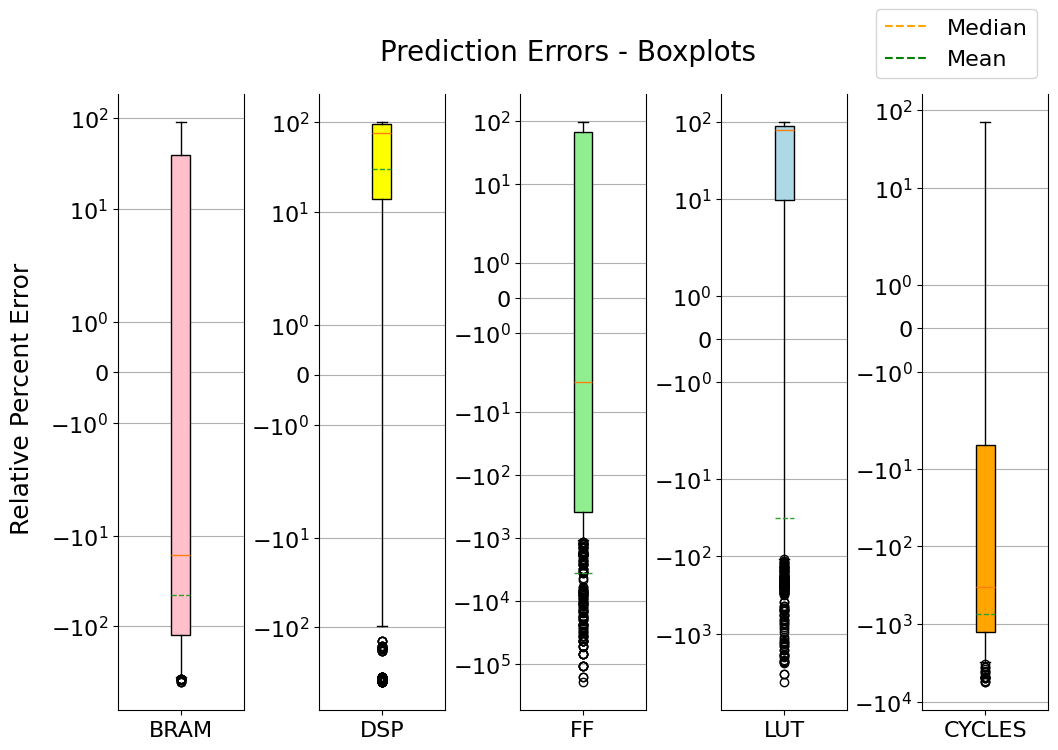

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({"font.size": 16})

fig, axis = plt.subplots(1, len(relative_percentage_errors), figsize=(12, 8))
axis = np.reshape(axis, -1)
fig.subplots_adjust(hspace=0.1, wspace=0.6)

iqr_weight = 1.5
colors = ["pink", "yellow", "lightgreen", "lightblue", "#FFA500"]

for i, errors in enumerate(relative_percentage_errors):
    label = prediction_labels[i]
    ax = axis[i]

    log_errors = np.sign(errors) * np.log10(np.abs(errors) + 1e-6)
    bplot = ax.boxplot(
        errors,
        whis=iqr_weight,
        tick_labels=[label.upper()],
        showfliers=True,
        showmeans=True,
        meanline=True,
        vert=True,
        patch_artist=True,
        # widths=0.3,
    )

    for j, patch in enumerate(bplot["boxes"]):
        patch.set_facecolor(colors[(i + j) % len(colors)])

    ax.yaxis.grid(True)
    ax.spines.top.set_visible(False)
    ax.xaxis.tick_bottom()
    # ax.set_yticks(np.arange(-3, 4))
    # ax.set_yticklabels([f"$10^{{{i}}}$" for i in np.arange(-3, 4)])
    ax.set_yscale("symlog")

median_line = Line2D([0], [0], color="orange", linestyle="--", linewidth=1.5, label="Median")
mean_line = Line2D([0], [0], color="green", linestyle="--", linewidth=1.5, label="Mean")

handles = [median_line, mean_line]
labels = ["Median", "Mean"]

legends = fig.legend(
    handles,
    labels,
    bbox_to_anchor=[0.9, 1],
    loc="upper right",
    ncol=len(labels) // 2,
)

ytext = fig.text(0.035, 0.5, "Relative Percent Error", va="center", rotation="vertical", size=18)
suptitle = fig.suptitle("Prediction Errors - Boxplots", fontsize=20, y=0.95)

plt.show()

In [7]:
fig.savefig(
    # "./box_plot_test_set.png",
    "./box_plot_benchmark.png",
    dpi=300,
    bbox_extra_artists=(legends, ytext, suptitle),
    bbox_inches="tight",
)

In [ ]:
from rule4ml.models.estimators import ModelWrapper
from rule4ml.parsers.data_parser import boards_data, default_board_map

test_df["architecture"] = test_df["model_name"].apply(lambda x: x.split("_")[0])
unique_architectures = test_df["architecture"].unique()

for architecture in unique_architectures:
    architecture_df = test_df[test_df["architecture"] == architecture]
    test_inputs_df = architecture_df[feature_labels].copy()
    print("=" * 80)
    print(f"Test Inputs: {test_inputs_df.shape}")
    print(f"Architecture: {architecture}")

    prediction_labels = ["bram", "dsp", "ff", "lut", "cycles"]
    test_targets_df = architecture_df[prediction_labels].copy()

    wrappers = []
    abs_errors = []
    sape_errors = []
    normed_errors = []
    relative_percentage_errors = []

    r2_scores = []
    smape_scores = []
    rmse_scores = []
    average_inference_times = []

    for label in prediction_labels:
        wrapper = ModelWrapper()
        # wrapper.load(
        #     f"./models/best_{label.upper()}_MLP_config.json",
        #     f"./models/best_{label.upper()}_MLP.weights.h5",
        # )
        wrapper.load(
            f"./models/vsynth/{label.upper()}_MLP_config.json",
            f"./models/vsynth/{label.upper()}_MLP.weights.h5",
        )
        wrappers.append(wrapper)
        wrapper.predict_from_df(test_inputs_df)

        print("=" * 80)
        print(f"Predicting {label.upper()}...")
        pred, r2, smape_value, rmse_value, avg_inference_time = wrapper.predict_from_df(
            test_inputs_df, test_targets_df[label].values, verbose=2
        )
        pred = pred.squeeze()

        r2_scores.append(r2)
        smape_scores.append(smape_value)
        rmse_scores.append(rmse_value)
        average_inference_times.append(avg_inference_time)

        gn = test_targets_df[label].values

        abs_errors.append(np.abs(gn - pred))
        sape_errors.append(2 * np.abs(gn - pred) / (np.abs(gn) + np.abs(pred) + 1e-6))

        board_name = ""
        for board, board_id in default_board_map.items():
            if board_id == test_inputs_df["board"].values[0]:
                board_name = board
                break

        if label != "cycles":
            max_vals = boards_data[board_name][f"max_{label}"]
            normed_gn = np.maximum(1 / max_vals, np.minimum(gn / max_vals, 2.0)) * 100
            normed_pred = np.maximum(1 / max_vals, np.minimum(pred / max_vals, 2.0)) * 100
            normed_errors.append(normed_gn - normed_pred)
        else:
            normed_errors.append(np.abs(gn - pred))

        relative_percentage_errors.append(((gn - pred) / (gn + 1)) * 100)

    print("=" * 80)
    print("Summary")
    print(f"Average R2 Score: {np.mean(r2_scores)}")
    print(f"Average SMAPE Score: {np.mean(smape_scores)}")
    print(f"Average RMSE Score: {np.mean(rmse_scores)}")
    print("Average Inference Time: {:.2E} seconds".format(np.mean(average_inference_times)))